In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

#### Above, find required imports per formatting best practices; expand cell below for information on Q1 - Q3.


##### Exercise questions 1 - 3 relate to ex-Jupyter functions required for setup and are noted below for reference:</br>
Q1. Create a 'data' folder in your local project repository. </br> 
Q2. Download these two CSV files and place them in the data folder: </br>  
&ensp; http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD </br>  
&emsp; - rename the file to `gdp_percapita.csv` </br>  
&ensp; Internet http://data.un.org/Data.aspx?d=ITU&f=ind1Code%3aI99H </br>  
&emsp; - rename the file to `internet_use.csv` </br>  
&ensp; Create a `notebooks` folder and launch a Jupyter Notebook in this folder.</br>  
Q3. Import the required packages with their customary aliases as follows: </br>  
    `import pandas as pd` </br>   
    `import numpy as np`  </br>  
    `import matplotlib.pyplot as plt`  </br>  
    `import seaborn as sns`

#### Q4. Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
#dataframe creation
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [3]:
#top and bottom row review
print (gdp_df.head(10))
print (gdp_df.tail(10))

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2021  1517.016266              NaN
1     Afghanistan  2020  1968.341002              NaN
2     Afghanistan  2019  2079.921861              NaN
3     Afghanistan  2018  2060.698973              NaN
4     Afghanistan  2017  2096.093111              NaN
5     Afghanistan  2016  2101.422187              NaN
6     Afghanistan  2015  2108.714173              NaN
7     Afghanistan  2014  2144.449634              NaN
8     Afghanistan  2013  2165.340915              NaN
9     Afghanistan  2012  2122.830759              NaN
     Country or Area  Year        Value  Value Footnotes
7652        Zimbabwe  1999  2866.032886              NaN
7653        Zimbabwe  1998  2931.725144              NaN
7654        Zimbabwe  1997  2896.147308              NaN
7655        Zimbabwe  1996  2867.026043              NaN
7656        Zimbabwe  1995  2641.378271              NaN
7657        Zimbabwe  1994  2670.106615              NaN
7658   

#### Q5. How many rows and columns are in gdp_df? What are the data types of each column?

In [4]:
#dataframe preview
print(gdp_df.info)
print(gdp_df.dtypes)

<bound method DataFrame.info of      Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2021  1517.016266              NaN
1        Afghanistan  2020  1968.341002              NaN
2        Afghanistan  2019  2079.921861              NaN
3        Afghanistan  2018  2060.698973              NaN
4        Afghanistan  2017  2096.093111              NaN
...              ...   ...          ...              ...
7657        Zimbabwe  1994  2670.106615              NaN
7658        Zimbabwe  1993  2458.783255              NaN
7659        Zimbabwe  1992  2468.278257              NaN
7660        Zimbabwe  1991  2781.787843              NaN
7661        Zimbabwe  1990  2704.757299              NaN

[7662 rows x 4 columns]>
Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object


#### A5.
  &ensp; SHAPE: </br>
    &emsp; 7662 rows; 4 columns
</br>
  &ensp; TYPE: </br>
    &emsp; Country or Area: object </br>
    &emsp; Year: int64 </br>
    &emsp; Value: float64 </br>
    &emsp; Value Footnotes: float64

#### Q6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [5]:
#Drop Value Footnotes
gdp_df = gdp_df.drop(columns=['Value Footnotes'])
#rename remaining columns
gdp_df = gdp_df.rename(columns = {'Country or Area': 'Country', 'Year':'Year', 'Value':'GDP_Per_Capita'})
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


#### Q7. How many countries have data for all years? Which countries are missing many (at least one) years of data? Look at the number of observations per year. What do you notice?

In [6]:
#determine min year
min_year = gdp_df['Year'].min()

#determine max year
max_year = gdp_df['Year'].max()

#determine number of years in dataset
count_years = gdp_df['Year'].nunique()

#print header stats
print('Min Year: ' + str(min_year))
print('Max Year: ' + str(max_year))
print('Number of years in dataset: ' + str(count_years))

#find countries with years missing; year count by country
country_list = gdp_df.groupby('Country')["Country"].count().reset_index(name='year_count').sort_values(by='year_count')

#How many countries have data for all years?
count_countries_complete_data = len(country_list[country_list["year_count"] == count_years])
print("Count of countries with data for all years: " + str(count_countries_complete_data))

#Which countries are missing many (at least one) years of data?
countries_missing_data = country_list[country_list["year_count"] < count_years]
print("Countries missing data:") 
print(countries_missing_data)

# format for A7
# missing_data_list = countries_missing_data["Country"].tolist()
# print(missing_data_list)


Min Year: 1990
Max Year: 2022
Number of years in dataset: 33
Count of countries with data for all years: 202
Countries missing data:
                       Country  year_count
53                    Djibouti          10
197                    Somalia          10
225   Turks and Caicos Islands          12
192  Sint Maarten (Dutch part)          14
112                     Kosovo          15
36              Cayman Islands          16
154                      Nauru          19
0                  Afghanistan          20
47                    CuraÃ§ao          22
169                      Palau          22
213    SÃ£o TomÃ© and Principe          22
180                      Qatar          23
166         Other small states          23
219                Timor-Leste          23
124                    Liberia          23
125                      Libya          24
185                 San Marino          25
195               Small states          26
149                 Montenegro          26
135    

#### A7.

How many countries have data for all years? </br>
A: 202 countries have data for all years. </br>
</br>
Which countries are missing many (at least one) years of data? </br>
A: 'Djibouti', 'Somalia', 'Turks and Caicos Islands', 'Sint Maarten (Dutch part)', 'Kosovo', 'Cayman Islands', 'Nauru', 'Afghanistan', 'CuraÃ§ao', 'Palau', 'SÃ£o TomÃ© and Principe', 'Qatar', 'Other small states', 'Timor-Leste', 'Liberia', 'Libya', 'San Marino', 'Small states', 'Montenegro', 'Maldives', 'Moldova', 'Israel', 'Iceland', 'Estonia', 'Croatia', 'Serbia', 'Slovenia', 'Lithuania', 'Latvia', 'West Bank and Gaza', 'Bosnia and Herzegovina', 'Cambodia', 'Kuwait', 'Slovak Republic', 'Turkmenistan', 'Lebanon', 'Tonga', 'Hungary', 'Aruba', 'Bhutan' </br>
</br>
What do you notice? </br>
A: Some of these entries, such as 'Sint Maarten (Dutch part)', 'CuraÃ§ao', and 'Other small states' seem to be poor country designations subject to varied grouping, data entry errors, and formatting errors.

#### Q8. Create some plots to show the distribution of GDP per capita for the year 2020. 
<ul>
<li> Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section.</li> 
<li> Create a histogram, a density plot, a boxplot, and a violin plot. </li>
<li> What do you notice when you look at these plots? </li>
<li> How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?</li>
</ul>

#### A8.
The plots below visually convey vartious measires of 2020 GDP Per Capita data.  The histogram and boxplot are helpful in understanding the frequency and disribution of GDP per capita for the year.  The box and violin plots are less visually telling, but show measures of central tendancy for GDP Per Capita data for the year across all countries.

C:\Users\hayle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


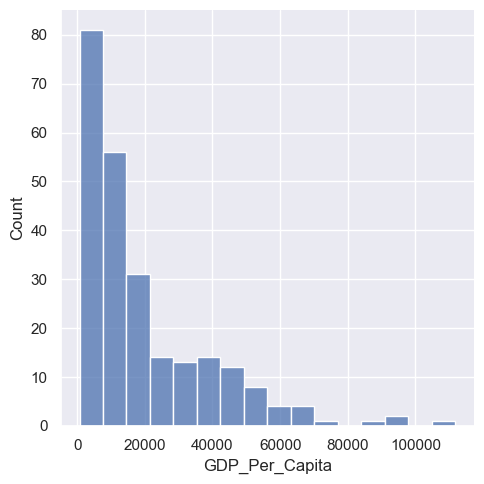

In [7]:
# Isolate data - GDP per capita for the year 2020

gdp_2020 = gdp_df[gdp_df["Year"] == 2020]

# Create a histogram
sns.displot(data=gdp_2020["GDP_Per_Capita"])

C:\Users\hayle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

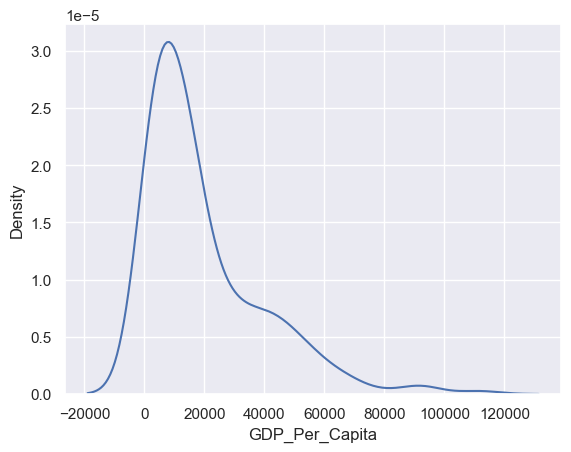

In [8]:
#create a density plot
sns.kdeplot(gdp_2020["GDP_Per_Capita"])


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

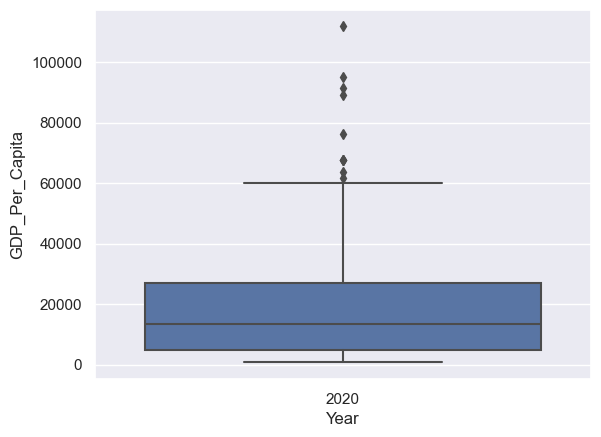

In [9]:
# Create a boxplot
sns.boxplot(x=gdp_2020["Year"], y=gdp_2020["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

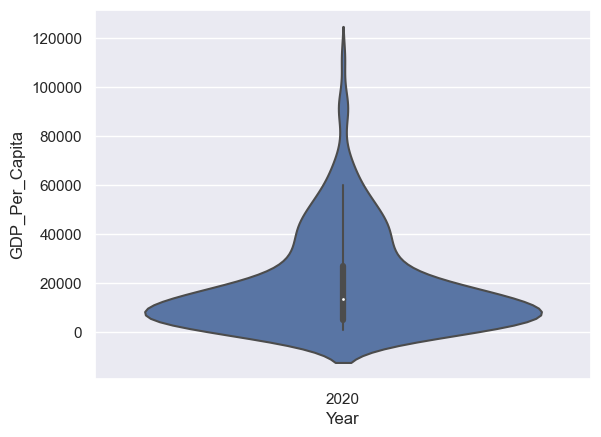

In [10]:
# Create a violin plot
sns.violinplot(x=gdp_2020["Year"], y=gdp_2020["GDP_Per_Capita"])

#### Q9. What was the median GDP per capita value in 2020?

#### A9. 13,135.0

In [11]:
med_gdp2020 = gdp_2020["GDP_Per_Capita"].median()
print(round((med_gdp2020), 2))

13358.0


#### Q10. Create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
<ul>
	<li> A boxplot</li>
	<li> A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)</li>
	<li> A scatterplot</li>
	<li> A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)</li>
 </ul>
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

#### A10. The graphs below show GDP values have increased over time. The box and bar plots illustrate this best; the scatter plots are relatively useless because the data is not continuous, though the trendline on the final chart reinforces our findings.

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

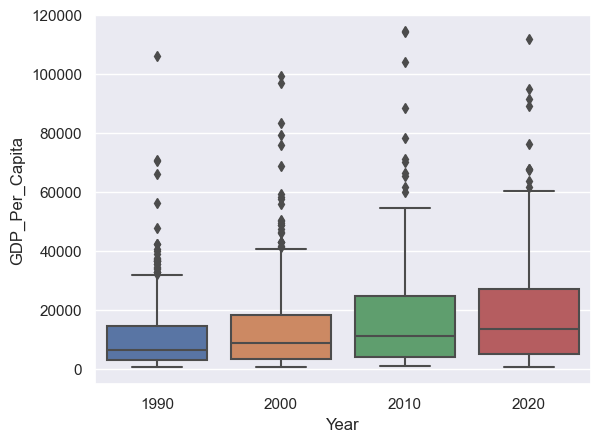

In [12]:
#subset data
gdp_decades = gdp_df[gdp_df["Year"].isin([1990,2000,2010,2020])]

#boxplot
sns.boxplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

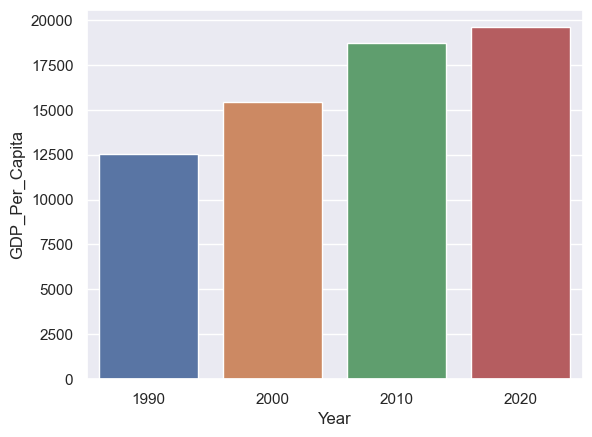

In [16]:
# barplot
sns.barplot(x="Year",
            y="GDP_Per_Capita",
            data=gdp_decades,
           errorbar=None)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

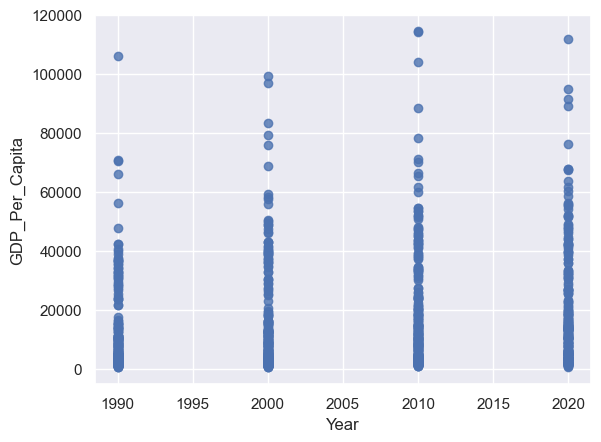

In [18]:
# scatterplot
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"], fit_reg=False)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

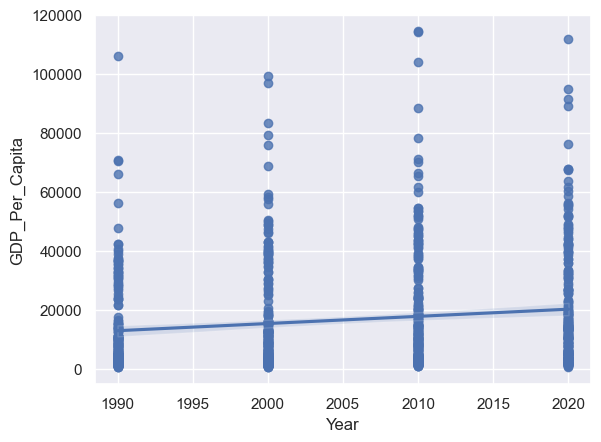

In [19]:
# scatterplot with trend line
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"], fit_reg=True)

#### Q11. Which country was the first to have a GDP per capita greater than $100,000?

#### A11. United Arab Emirates was the first country to have a GDP Per Capita greater than 100,000 in the year 1990 with a GDP Per Capita of $105,893.63 

In [51]:
#All countries with 100,000 GDP Per Capita
gdp_100k = gdp_df[gdp_df["GDP_Per_Capita"] > 100000]

#earliest year
min_year_100k = gdp_100k["Year"].min()

#country/countries
first_100k_gdp = gdp_100k[gdp_100k["Year"] == min_year_100k]

#answer
print(round(first_100k_gdp, 2))

                   Country  Year  GDP_Per_Capita
7302  United Arab Emirates  1990       105893.63


#### Q12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

#### A12. Luxembourg had the highest GDP Per Capita of 111,751.31 in 2020.  GDP Per Capita increased steadily until it peaked just above 120k in 2007, then fell to 115k and has remained consistent since.

Country with the greatest GDP Per Capita in 2020:
         Country  Year  GDP_Per_Capita
4148  Luxembourg  2020   111751.314751


C:\Users\hayle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hayle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Luxembourg GDP Per Capita Over Time')

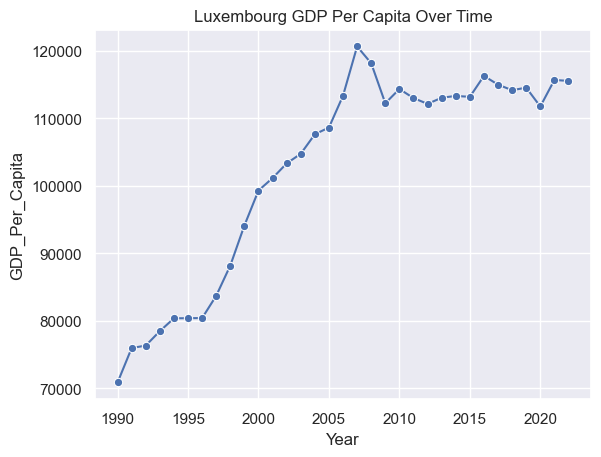

In [79]:
#Country with highest GDP Per Capita in 2020:
highest_gdp2020 = gdp_2020[gdp_2020["GDP_Per_Capita"] == gdp_2020["GDP_Per_Capita"].max()]
print("Country with the greatest GDP Per Capita in 2020:")
print(highest_gdp2020)

#source plot data
lux_all = gdp_df[gdp_df["Country"] == "Luxembourg"]

#plot
sns.lineplot(x='Year',
             y='GDP_Per_Capita',
             data=lux_all,
            marker='o').set_title('Luxembourg GDP Per Capita Over Time')

#### Q13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

#### A13. Burundi had the lowest GDP Per Capita in 2020 at 711.36. Burundi's GDP Per Capita has decreased steadily since its peak of 1200 in 1991.

Country with the lowest GDP Per Capita in 2020:
     Country  Year  GDP_Per_Capita
973  Burundi  2020      711.355263


C:\Users\hayle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hayle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Burundi GDP Per Capita Over Time')

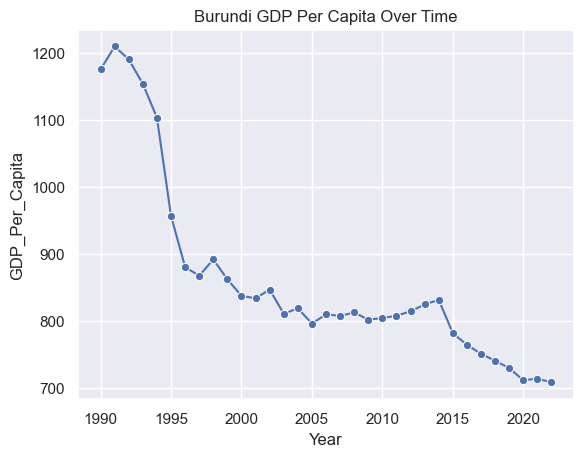

In [82]:
#Country with lowest GDP Per Capita in 2020:
lowest_gdp2020 = gdp_2020[gdp_2020["GDP_Per_Capita"] == gdp_2020["GDP_Per_Capita"].min()]
print("Country with the lowest GDP Per Capita in 2020:")
print(lowest_gdp2020)

#source plot data
bur_all = gdp_df[gdp_df["Country"] == "Burundi"]

#plot
sns.lineplot(x='Year',
             y='GDP_Per_Capita',
             data=bur_all,
            marker='o').set_title('Burundi GDP Per Capita Over Time')

#### Q14.
Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.


In [83]:
internet_df = pd.read_csv('../data/internet_use.csv')

ParserError: Error tokenizing data. C error: Expected 4 fields in line 4675, saw 6


#### Q15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

#### Q16. Look at the number of observations in this dataset per year. What do you notice?

#### Q17. What is the first year to have a non-zero internet users percentage value?

#### Q18. How does the distribution of internet users percent differ for 2000 and 2014?

#### Q19. For how many countries was the percentage of internet users below 5% in 2014?

#### Q20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

#### Q21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

#### Q22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

#### Q23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.


#### Q24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

#### Q25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?